# Loading/Preparing MNIST fashion data set

## Loading the MNIST fashion data set

In [0]:
import tensorflow as tf
from tensorflow import keras

cifar10 = keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


## Preprocess the data

In [0]:
train_images = train_images.reshape((50000, 32, 32, 3)) / 255.0
test_images = test_images.reshape((10000, 32, 32, 3)) / 255.0

#Model #1: Overfitting

At first, I used a model with one hidden layer containing a single neuron.  This was giving my test accuracy of less then 0.5, which is bad.  I added just one more neuron to the hidden layer and drastically improved my accuracy to over 70%.

## Build the model

In [0]:
# set up the layers

model = keras.Sequential([
      keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
      keras.layers.MaxPooling2D((2, 2)),
      #
      keras.layers.Conv2D(64, (3, 3), activation='relu'),
      keras.layers.MaxPooling2D((2, 2)),
      #
      keras.layers.Conv2D(64, (3, 3), activation='relu'),
      #
      keras.layers.Flatten(),
      keras.layers.Dense(64, activation='relu'),
      keras.layers.Dense(10, activation='softmax')
  ])
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________

##Compile and train the model

In [0]:
# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 15s 302us/sample - loss: 1.5204 - acc: 0.4468 - val_loss: 1.2194 - val_acc: 0.5587
Epoch 2/20
50000/50000 [==============================] - 12s 237us/sample - loss: 1.1491 - acc: 0.5944 - val_loss: 1.0993 - val_acc: 0.6117
Epoch 3/20
50000/50000 [==============================] - 12s 238us/sample - loss: 0.9931 - acc: 0.6514 - val_loss: 1.0332 - val_acc: 0.6381
Epoch 4/20
50000/50000 [==============================] - 12s 237us/sample - loss: 0.8971 - acc: 0.6862 - val_loss: 0.9877 - val_acc: 0.6617
Epoch 5/20
50000/50000 [==============================] - 12s 237us/sample - loss: 0.8258 - acc: 0.7107 - val_loss: 0.8789 - val_acc: 0.6947
Epoch 6/20
50000/50000 [==============================] - 12s 238us/sample - loss: 0.7688 - acc: 0.7320 - val_loss: 0.8709 - val_acc: 0.7018
Epoch 7/20
50000/50000 [==============================] - 12s 236us/sample - loss: 0.7202 - acc: 0.7487 

## Evaluate accuracy

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 117us/sample - loss: 1.1963 - acc: 0.7020
Test accuracy: 0.702


## Training/test loss/accuracy during training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

In [0]:
import matplotlib.pyplot as plt
import numpy as np

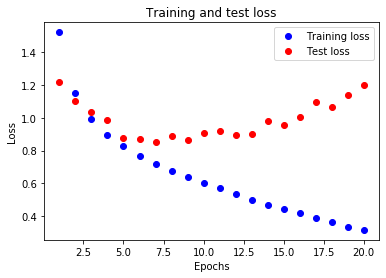

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

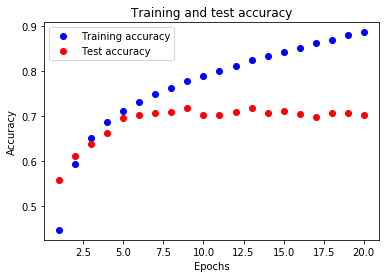

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Model #2: Uderfitting

## Build the model

In [0]:
# set up the layers

model = keras.Sequential([
      keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
      keras.layers.MaxPooling2D((2, 2)),
      #
      # keras.layers.Conv2D(64, (3, 3), activation='relu'),
      # keras.layers.MaxPooling2D((2, 2)),
      # #
      # keras.layers.Conv2D(64, (3, 3), activation='relu'),
      # keras.layers.MaxPooling2D((2, 2)),
      #
      keras.layers.Flatten(),
      keras.layers.Dense(10, activation='relu'),
      keras.layers.Dense(10, activation='softmax')
  ])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                72010     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
Total params: 73,016
Trainable params: 73,016
Non-trainable params: 0
_________________________________________________________________


##Compile and train the model

In [0]:
# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 10
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 9s 173us/sample - loss: 1.9233 - acc: 0.2583 - val_loss: 1.7513 - val_acc: 0.2995
Epoch 2/10
50000/50000 [==============================] - 9s 173us/sample - loss: 1.7033 - acc: 0.3180 - val_loss: 1.6871 - val_acc: 0.3287
Epoch 3/10
50000/50000 [==============================] - 9s 172us/sample - loss: 1.6462 - acc: 0.3351 - val_loss: 1.6517 - val_acc: 0.3373
Epoch 4/10
50000/50000 [==============================] - 9s 173us/sample - loss: 1.5839 - acc: 0.3666 - val_loss: 1.5271 - val_acc: 0.4095
Epoch 5/10
50000/50000 [==============================] - 9s 172us/sample - loss: 1.4965 - acc: 0.4109 - val_loss: 1.5066 - val_acc: 0.4044
Epoch 6/10
50000/50000 [==============================] - 8s 170us/sample - loss: 1.4554 - acc: 0.4301 - val_loss: 1.4621 - val_acc: 0.4387
Epoch 7/10
50000/50000 [==============================] - 9s 174us/sample - loss: 1.4288 - acc: 0.4409 - val_l

## Evaluate accuracy

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 96us/sample - loss: 1.4422 - acc: 0.4510
Test accuracy: 0.451


## Training/test loss/accuracy during training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

In [0]:
import matplotlib.pyplot as plt
import numpy as np

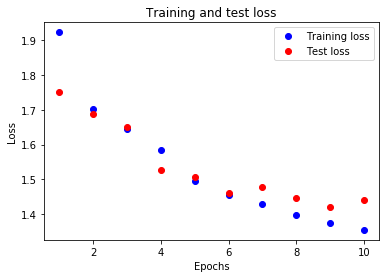

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

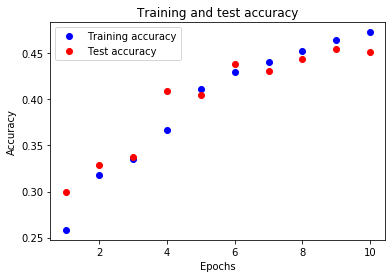

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model #3: Pretty Good Fit

I tried to implement data augmentation but I couldn't quite get it to work properly.  At the moment, the model is overfitting.  I think I can combat this with proper implementation of data augmentation but had a lot of trouble doing it.  Since I was having a lot of errors and my results seemed to be erroneous using augmentation, I present here the model without data augmentation, and only dropout.  You can choose to run with data augmentation if you would like to see.

## Import a few extra goodies

In [0]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


## Build the model

In [0]:
# Configure the model
batch_size = 32
#num_classes = 10
epochs = 30
data_augmentation = False
#num_predictions = 20

# set up the layers
model = keras.Sequential([
    keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    #
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    #
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    #
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])
model.summary()

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model

if not data_augmentation:
    print('Not using data augmentation.')
    history = model.fit(train_images,
                train_labels,
                batch_size=batch_size,
                epochs=epochs,
                validation_data=(test_images, test_labels))
else:
  print('Using real-time data augmentation.')
  train_datagen = ImageDataGenerator(
    rescale=1./255, ## already rescaled when importing data set.
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

  #test_datagen = ImageDataGenerator(rescale=1./255)
  train_datagen.fit(train_images)

  train_generator = train_datagen.flow(
    train_images,
    train_labels,
    #target_size=(32, 32),
    batch_size = batch_size)

  history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=(test_images, test_labels))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 13, 13, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 4, 4, 64)          18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 256)              

## Evaluate accuracy

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 114us/sample - loss: 1.0476 - acc: 0.7149
Test loss: 1.0475874546051025
Test accuracy: 0.7149


## Training/test loss/accuracy during training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

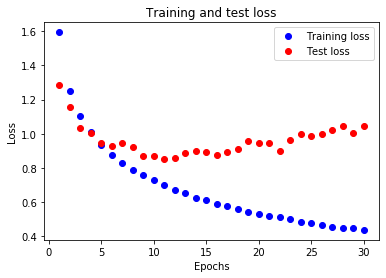

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

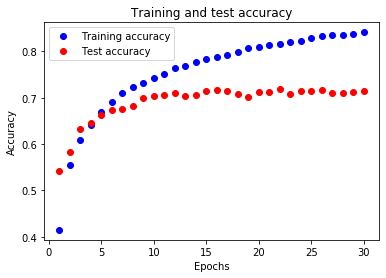

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()